In [1]:
import pandas as pd,numpy as np, matplotlib.pyplot as plt,seaborn as sns,warnings
warnings.filterwarnings('ignore')

In [2]:
df_shinhanbank = pd.read_excel('Performance_review_2022.xlsx')

In [3]:
df_shinhanbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #                 0 non-null      float64
 1   Year              136 non-null    float64
 2   Sales Code        137 non-null    int64  
 3   Level             136 non-null    object 
 4   Product           136 non-null    object 
 5   Joining Date      136 non-null    object 
 6   Status            136 non-null    object 
 7   Vintage           136 non-null    float64
 8   Lastworking Date  57 non-null     object 
 9   Jan               71 non-null     float64
 10  Feb               74 non-null     float64
 11  Mar               88 non-null     float64
 12  Apr               100 non-null    float64
 13  May               101 non-null    float64
 14  Jun               95 non-null     float64
 15  Jul               92 non-null     float64
 16  Aug               85 non-null     float64
 1

In [4]:
def Target_loan(dk):
    if dk == 'SO':
        target = 380000000 
    elif dk == 'SSO':
        target = 520000000
    elif dk == 'SE':
        target = 780000000
    elif dk == 'BDM':
        target = 1000000000
    else:
        target = 720000000
    return target

In [5]:
def Target_card(dk):
    if dk == 'SO':
        target = 2 
    elif dk == 'SSO':
        target = 3
    elif dk == 'SE':
        target = 4
    elif dk == 'BDM':
        target = 5
    else:
        target = 10
    return target

In [6]:
### DROP ROWS HAVE LESS THAN 2 DATA POINTS
df_shinhanbank.dropna(thresh=2,axis=0,inplace=True)

### MODIFY COLUMNS NAME
df_shinhanbank.columns = df_shinhanbank.columns.str.upper()

### FILL NAN VALUES OF COLUMNS LASTWORKING DATE
df_shinhanbank['LASTWORKING DATE'] = df_shinhanbank['LASTWORKING DATE'].fillna('31/12/2022')

### MODIFY TYPE OF COLUMNS
df_shinhanbank = df_shinhanbank.astype({'SALES CODE':'object','LINEMANAGER CODE':'int','VINTAGE':'int'})
df_shinhanbank['LINEMANAGER CODE'] = df_shinhanbank['LINEMANAGER CODE'].astype('object')

df_shinhanbank['JOINING DATE'] = pd.to_datetime(df_shinhanbank['JOINING DATE'],dayfirst=True)
df_shinhanbank['LASTWORKING DATE'] = pd.to_datetime(df_shinhanbank['LASTWORKING DATE'],dayfirst=True)
df_shinhanbank['DAY WORKING'] = df_shinhanbank['LASTWORKING DATE']-df_shinhanbank['JOINING DATE']
df_shinhanbank['DAY WORKING'] = df_shinhanbank['DAY WORKING'].dt.days

df_shinhanbank['STATUS'] = np.where(df_shinhanbank['STATUS'].str.contains('Active')==True,'1','0')

### DROP COLUMNS WE DON'T NEED
df_shinhanbank.drop(columns=['JOINING DATE','LASTWORKING DATE','#','YEAR','PRODUCT','NUMBER OF SQM','NUMBER OF PIP','CATEGORY','CHANNEL'],inplace=True)

### INSERT KPI OF EACH POSITION
df_shinhanbank.insert(2,'KPI_CONSUMER LOAN(80%)',df_shinhanbank['LEVEL'].apply(Target_loan))
df_shinhanbank.insert(3,'KPI_CREDIT CARD(20%)',df_shinhanbank['LEVEL'].apply(Target_card))

In [7]:
df_levelsum = df_shinhanbank.dropna(axis=0).reset_index().drop(columns='index')
df_BDS = df_shinhanbank.loc[df_shinhanbank['LEVEL']=='BDS',:].dropna(axis=0).reset_index().drop(columns='index')
df_BDM = df_shinhanbank.loc[df_shinhanbank['LEVEL']=='BDM',:].dropna(axis=0).reset_index().drop(columns='index')
df_SE = df_shinhanbank.loc[df_shinhanbank['LEVEL']=='SE',:].dropna(axis=0).reset_index().drop(columns='index')
df_SSO = df_shinhanbank.loc[df_shinhanbank['LEVEL']=='SSO',:].dropna(axis=0).reset_index().drop(columns='index')
df_SO = df_shinhanbank.loc[df_shinhanbank['LEVEL']=='SO',:].dropna(axis=0).reset_index().drop(columns='index')

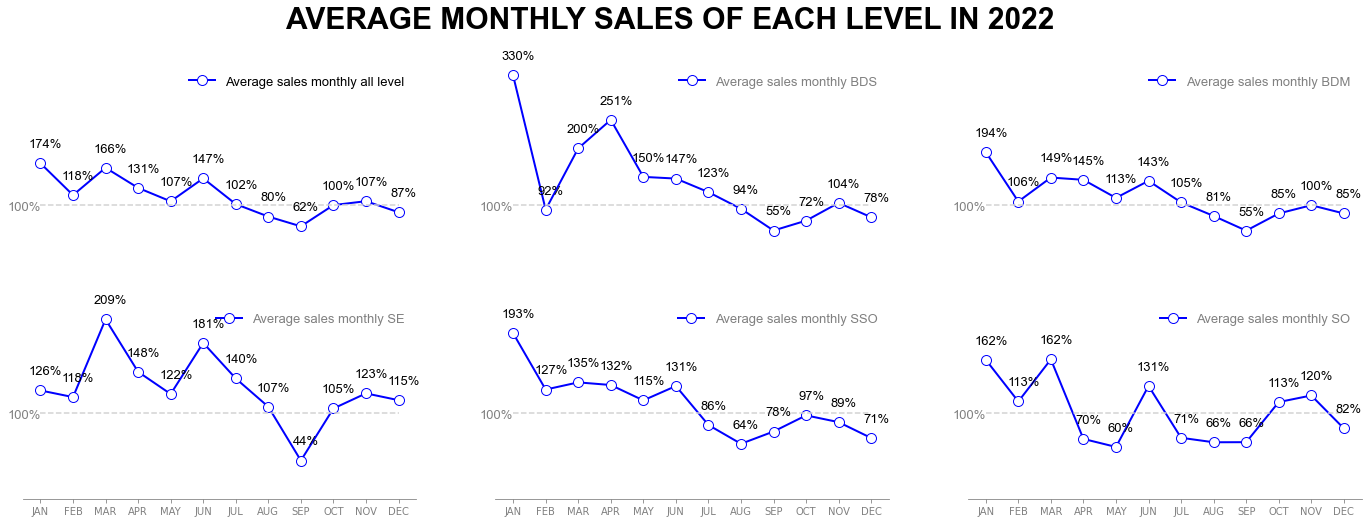

In [8]:
fig,ax = plt.subplots(2,3,figsize=(24,8))
plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=13
   
mean1 = []
for month in df_levelsum.columns[6:-3]:
    average = np.mean(df_levelsum.loc[:,month])
    mean1.append(average*100)
ax[0,0].plot(df_levelsum.columns[6:-3],mean1,color='blue',linewidth=2,marker='o',mfc='white',ms=10,label='Average sales monthly all level')
ax[0,0].plot(df_levelsum.columns[6:-3],[100]*12,color='lightgray',linestyle='--')
ax[0,0].spines['left'].set_visible(False)
ax[0,0].spines['bottom'].set_visible(False)
ax[0,0].spines['top'].set_visible(False)
ax[0,0].spines['right'].set_visible(False)
for x,y in zip(np.arange(0,len(df_levelsum.columns[6:-3])),mean1):
    label = "{:.0f}%".format(y)
    ax[0,0].annotate(label,(x,y),textcoords="offset points",xytext=(5,16),ha='center',color='black',fontsize=13)
ax[0,0].legend(frameon=False,loc='upper right',labelcolor='black')
ax[0,0].annotate('100%',('JAN',100),textcoords="offset points",xytext=(0,-5),ha='right',color='gray',fontsize=13)
ax[0,0].tick_params(colors='gray')
ax[0,0].set_ylim(0,350)
ax[0,0].set_yticks([])
ax[0,0].set_xticks([])

mean2 = []
for month in df_BDS.columns[6:-3]:
    average = np.mean(df_BDS.loc[:,month])
    mean2.append(average*100)
ax[0,1].plot(df_BDS.columns[6:-3],mean2,color='blue',linewidth=2,marker='o',mfc='white',ms=10,label='Average sales monthly BDS')
ax[0,1].plot(df_BDS.columns[6:-3],[100]*12,color='lightgray',linestyle='--')
ax[0,1].spines['left'].set_visible(False)
ax[0,1].spines['bottom'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
for x,y in zip(np.arange(0,len(df_BDS.columns[6:-3])),mean2):
    label = "{:.0f}%".format(y)
    ax[0,1].annotate(label,(x,y),textcoords="offset points",xytext=(5,16),ha='center',color='black',fontsize=13)
ax[0,1].legend(frameon=False,loc='upper right',labelcolor='gray')
ax[0,1].annotate('100%',('JAN',100),textcoords="offset points",xytext=(0,-5),ha='right',color='gray',fontsize=13)
ax[0,1].tick_params(colors='gray')
ax[0,1].set_ylim(0,350)
ax[0,1].set_yticks([])
ax[0,1].set_xticks([])

mean3 = []
for month in df_BDM.columns[6:-3]:
    average = np.mean(df_BDM.loc[:,month])
    mean3.append(average*100)
ax[0,2].plot(df_BDM.columns[6:-3],mean3,color='blue',linewidth=2,marker='o',mfc='white',ms=10,label='Average sales monthly BDM')
ax[0,2].plot(df_BDM.columns[6:-3],[100]*12,color='lightgray',linestyle='--')
ax[0,2].spines['left'].set_visible(False)
ax[0,2].spines['bottom'].set_visible(False)
ax[0,2].spines['top'].set_visible(False)
ax[0,2].spines['right'].set_visible(False)
for x,y in zip(np.arange(0,len(df_BDM.columns[6:-3])),mean3):
    label = "{:.0f}%".format(y)
    ax[0,2].annotate(label,(x,y),textcoords="offset points",xytext=(5,16),ha='center',color='black',fontsize=13)
ax[0,2].legend(frameon=False,loc='upper right',labelcolor='gray')
ax[0,2].annotate('100%',('JAN',100),textcoords="offset points",xytext=(0,-5),ha='right',color='gray',fontsize=13)
ax[0,2].tick_params(colors='gray')
ax[0,2].set_ylim(0,350)
ax[0,2].set_yticks([])
ax[0,2].set_xticks([])

mean4 = []
for month in df_SE.columns[6:-3]:
    average = np.mean(df_SE.loc[:,month])
    mean4.append(average*100)
ax[1,0].plot(df_SE.columns[6:-3],mean4,color='blue',linewidth=2,marker='o',mfc='white',ms=10,label='Average sales monthly SE')
ax[1,0].plot(df_SE.columns[6:-3],[100]*12,color='lightgray',linestyle='--')
ax[1,0].spines['left'].set_visible(False)
ax[1,0].spines['bottom'].set_color('gray')
ax[1,0].spines['top'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
for x,y in zip(np.arange(0,len(df_SE.columns[6:-3])),mean4):
    label = "{:.0f}%".format(y)
    ax[1,0].annotate(label,(x,y),textcoords="offset points",xytext=(5,16),ha='center',color='black',fontsize=13)
ax[1,0].legend(frameon=False,loc='upper right',labelcolor='gray')
ax[1,0].annotate('100%',('JAN',100),textcoords="offset points",xytext=(0,-5),ha='right',color='gray',fontsize=13)
ax[1,0].tick_params(colors='gray')
ax[1,0].set_ylim(0,230)
ax[1,0].set_yticks([])


mean5 = []
for month in df_SSO.columns[6:-3]:
    average = np.mean(df_SSO.loc[:,month])
    mean5.append(average*100)
ax[1,1].plot(df_SSO.columns[6:-3],mean5,color='blue',linewidth=2,marker='o',mfc='white',ms=10,label='Average sales monthly SSO')
ax[1,1].plot(df_SSO.columns[6:-3],[100]*12,color='lightgray',linestyle='--')
ax[1,1].spines['left'].set_visible(False)
ax[1,1].spines['bottom'].set_color('gray')
ax[1,1].spines['top'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)
for x,y in zip(np.arange(0,len(df_SSO.columns[6:-3])),mean5):
    label = "{:.0f}%".format(y)
    ax[1,1].annotate(label,(x,y),textcoords="offset points",xytext=(5,16),ha='center',color='black',fontsize=13)
ax[1,1].legend(frameon=False,loc='upper right',labelcolor='gray')
ax[1,1].annotate('100%',('JAN',100),textcoords="offset points",xytext=(0,-5),ha='right',color='gray',fontsize=13)
ax[1,1].tick_params(colors='gray')
ax[1,1].set_ylim(0,230)
ax[1,1].set_yticks([])


mean6 = []
for month in df_SO.columns[6:-3]:
    average = np.mean(df_SO.loc[:,month])
    mean6.append(average*100)
ax[1,2].plot(df_SO.columns[6:-3],mean6,color='blue',linewidth=2,marker='o',mfc='white',ms=10,label='Average sales monthly SO')
ax[1,2].plot(df_SO.columns[6:-3],[100]*12,color='lightgray',linestyle='--')
ax[1,2].spines['left'].set_visible(False)
ax[1,2].spines['bottom'].set_color('gray')
ax[1,2].spines['top'].set_visible(False)
ax[1,2].spines['right'].set_visible(False)
for x,y in zip(np.arange(0,len(df_SO.columns[6:-3])),mean6):
    label = "{:.0f}%".format(y)
    ax[1,2].annotate(label,(x,y),textcoords="offset points",xytext=(5,16),ha='center',color='black',fontsize=13)
ax[1,2].legend(frameon=False,loc='upper right',labelcolor='gray')
ax[1,2].annotate('100%',('JAN',100),textcoords="offset points",xytext=(0,-5),ha='right',color='gray',fontsize=13)
ax[1,2].tick_params(colors='gray')
ax[1,2].set_ylim(0,230)
ax[1,2].set_yticks([])

fig.suptitle('AVERAGE MONTHLY SALES OF EACH LEVEL IN 2022',fontsize=30,fontweight='bold');
# fig.savefig(r'C:\Users\ADMIN\Documents\DATA SCIENCE\Project\Shinhan Bank\AVERAGE MONTHLY SALES OF EACH LEVEL IN 2022.png',facecolor='white',transparent=True)

+ All level: We can see that the average kpi in the first 7 months of the year is above 100%, highest in January (174%), lower in February because this time is near Tet holiday, then increase in March, decrease until May and then increase again. in June, started a strong downtrend until September (below 100%), continued to increase again and kept above and below 100% at the end of the year.
+ BDS: in January the kpi reached the highest level (330%), fell sharply in February (92%), increased again 2 months after the holiday (200% in March and 251% in April), then started a strong decreasing cycle until September (55%), continued to increase slightly at the end of the year.
+ BDM: In the first 7 months of the year, the kpi is always above 100%, the highest is in January (194%), most of the last 5 months of the year are below 100%, the lowest is in September (55%).
+ There is a difference at SE level, the first 8 months and the last 3 months of the year always reach over 100% kpi, the highest in March (209%). After Tet holiday, SE ran very strong kpi 6 months later (March to August), in September it dropped to 44% and then in the last 3 months of the year, kpi was 105%, 123%, 115% respectively.
+ At SSO level, there is a difference, the first 6 months of the year kpi is above 100%, highest in January (193%), sharply decreased in August (64%) and increased again in the middle of the month but still below 100%.
+ Level SO is usually employees with little experience, so kpi is often unstable. January started with a kpi of 162%, decreased in February (113%), increased again in March (162%), then dropped sharply in March and April (70% and 60%), increased again in January. 6 (131%), 3 months later, it dropped sharply to 71%, 66%, 66% respectively, and then increased again to 113%, 120% in October and November. This shows that most SO just try to get out of pips (if you get piped 3 times in a row, you will be fired).


In [9]:
full_year = df_shinhanbank.sort_values(by='DAY WORKING',ascending=False).dropna(axis=0).reset_index().drop(columns='index')
table_pivot = pd.pivot_table(full_year,index='LINEMANAGER CODE',columns='LEVEL',values='AVG PERFORMANCE',aggfunc=np.mean).dropna(thresh=3).dropna(axis=1)

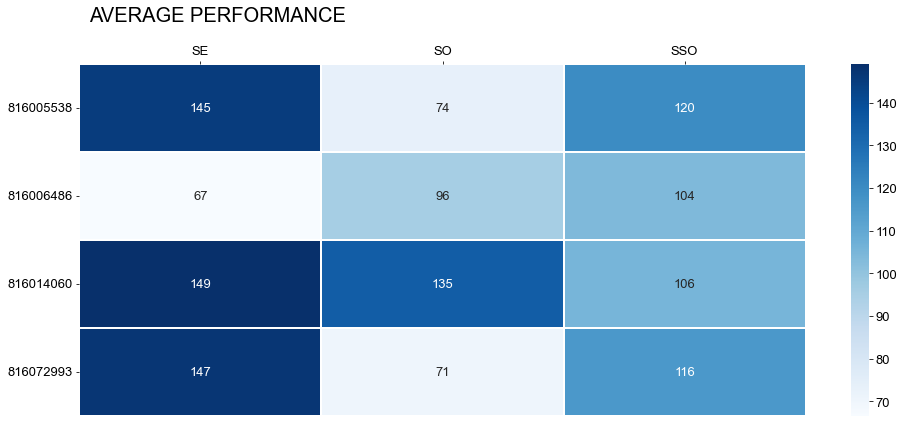

In [10]:
### 3 BDM and 1 BDS
fig,ax = plt.subplots(figsize=(14,6))
plt.rcParams['font.family']='Arial'
plt.rcParams['font.size']=13
fig.suptitle('AVERAGE PERFORMANCE',ha='right',color='black',fontsize=20,x=0.35)
ax = sns.heatmap(data=table_pivot*100,annot=True,fmt='.0f',linewidth=0.01,linecolor='white',cmap='Blues');
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.tick_top()
ax.set_yticklabels(table_pivot.index,rotation=0)
fig.tight_layout()

+ We can see that management (816014060) has the best 3 levels (SE,SO,SSO) respectively 149%, 135%, 106% in 2022.
+ Manager (816006486) has the lowest performance (67%, 96%, 104%).
+ At SE, SO level, manager (816014060) has the best performance: 149%, 135%, and at SSO level, manager (816005538) has the best perfomance